<a href="https://colab.research.google.com/github/Patriciafg27/MIA3_MachineLearning/blob/main/RepasoKeras_APIFuncional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

Keras es una librería construída para el prototipado rápido de modelos de deep learning. Las ventajas de Keras frente a otros frameworks de deep learning son obvios:

- Rápido prototipado (entrenamiento y evaluación) de modelos de deep learning.

- Posee una api sencilla con la que se pueden añadir estructuras complejas en redes de neuronas (capas).

- Se integra con las herramientas de tensorflow de forma nativa.

Keras permite construir modelos utilizando diferentes tipos de api (Application Porgram Interface). Las distintas apis tienen sus ventajas e inconvenientes, en esta clase vamos a estudiar la api secuencial y la api funcional de Keras.

# Keras Sequential API

La api secuencial de Keras permite construir modelos añadiendo capas en forma de secuencia. Su uso es muy directo siguiendo los siguientes pasos:

- Definimos el modelo utilizando la clase Sequential.

- Añadimos capas al modelo utilizando el método .add()

- Comppilamos el modelo utilizando el método .compile()

In [1]:
import tensorflow.keras as keras
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
# Ejemplo
dataset = sns.load_dataset("iris") #Cargamos datos
model = keras.models.Sequential() #Definimos modelo secuencial. Le ponemos capa densa y un softmax
layer_1 = keras.layers.Dense(10, activation="relu")
output = keras.layers.Dense(3, activation="softmax") #Como tiene 3 clases le ponemos un 3.
model.add(layer_1)
model.add(output)
model.compile(optimizer="adam", loss="categorical_crossentropy")

In [6]:
type(layer_1) #Sabe que es una capa

keras.layers.core.dense.Dense

In [8]:
type(output)

keras.layers.core.dense.Dense

In [7]:
type(model) #Keras distingue entre funcional y secuencial

keras.engine.sequential.Sequential

In [11]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]
Y_dummies = pd.get_dummies(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_dummies)

In [16]:
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 3.9726
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 3.7371
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 3.5024
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 3.2806
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 3.0541
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 2.8405
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 2.6287
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 2.4299
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 2.2522
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 2.0797
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 1.9287
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 1.7904
Epoch 13/300
4/4 [==============================] - 0s 5ms/st

In [17]:
# Realizar predicción
model.predict(X_test)

array([[1.5148122e-02, 4.3128967e-01, 5.5356222e-01],
       [6.4481571e-02, 6.5853173e-01, 2.7698672e-01],
       [1.3840471e-02, 3.7241292e-01, 6.1374652e-01],
       [6.8295537e-03, 2.1193126e-01, 7.8123927e-01],
       [9.7218418e-01, 2.7257349e-02, 5.5854645e-04],
       [9.0623504e-01, 8.9331329e-02, 4.4335783e-03],
       [1.5526500e-02, 4.1800556e-01, 5.6646794e-01],
       [9.3699104e-01, 6.0254499e-02, 2.7544436e-03],
       [9.1274589e-02, 6.9032604e-01, 2.1839938e-01],
       [6.7290917e-02, 7.2556150e-01, 2.0714763e-01],
       [2.4711128e-02, 6.3344526e-01, 3.4184366e-01],
       [4.6200389e-03, 2.0596032e-01, 7.8941959e-01],
       [5.6923173e-02, 7.2374356e-01, 2.1933329e-01],
       [3.4754982e-03, 1.8510313e-01, 8.1142139e-01],
       [1.0298195e-02, 3.5871243e-01, 6.3098931e-01],
       [3.1016653e-03, 1.8208718e-01, 8.1481117e-01],
       [9.8206812e-01, 1.7577955e-02, 3.5392112e-04],
       [7.1256082e-03, 3.5082883e-01, 6.4204556e-01],
       [5.5134457e-02, 7.362

In [18]:
model.layers #Ver las capas

In [19]:
model.layers[0] #Acceder a ellas

In [20]:
model.layers[0].weights[0] #Sacar los pesos

<tf.Variable 'dense_6/kernel:0' shape=(4, 10) dtype=float32, numpy=
array([[-0.05907703,  0.13594085,  0.58555615,  0.03290524,  0.06702138,
        -0.15852037, -0.20654792, -0.2584232 , -0.34970734,  0.6617251 ],
       [-0.51540715,  0.5908997 ,  0.4861669 ,  0.49165756, -0.07305044,
         0.0795387 , -0.4412767 , -0.33541903,  0.45225474,  0.5537486 ],
       [ 0.42653835, -0.36291283, -0.1412799 ,  0.12522598,  0.47711432,
        -0.43787223, -0.1277976 ,  0.08147305,  0.7352755 , -0.26756904],
       [-0.4920831 , -0.80346584, -0.9752599 ,  0.3465238 ,  0.29343835,
        -0.05373859, -0.26805922,  0.5977533 ,  0.0754126 , -0.52686226]],
      dtype=float32)>

In [21]:
model.layers[0].weights[0].numpy() #Cada fila representa a que columna cada peso.

array([[-0.05907703,  0.13594085,  0.58555615,  0.03290524,  0.06702138,
        -0.15852037, -0.20654792, -0.2584232 , -0.34970734,  0.6617251 ],
       [-0.51540715,  0.5908997 ,  0.4861669 ,  0.49165756, -0.07305044,
         0.0795387 , -0.4412767 , -0.33541903,  0.45225474,  0.5537486 ],
       [ 0.42653835, -0.36291283, -0.1412799 ,  0.12522598,  0.47711432,
        -0.43787223, -0.1277976 ,  0.08147305,  0.7352755 , -0.26756904],
       [-0.4920831 , -0.80346584, -0.9752599 ,  0.3465238 ,  0.29343835,
        -0.05373859, -0.26805922,  0.5977533 ,  0.0754126 , -0.52686226]],
      dtype=float32)

In [ ]:
model.pop() #Elimina la ultima capa

# Ejercicio

Entrenad un modelo de 3 capas densas utilizando la api secuencial de Keras para el dataset penguins. El objetivo es clasificar el sexo del pingüino.

In [42]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [48]:
X = pd.get_dummies(dataset.iloc[:,:-1])
Y = pd.get_dummies(dataset.iloc[:,-1:])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [49]:
Y_train.shape

(249, 2)

In [50]:
X_train.shape

(249, 10)

In [51]:
model1 = keras.models.Sequential() 
layer_11 = keras.layers.Dense(9, activation="relu")  #Numeros 9,8,5,2.. depende de las capas que tengo arriba. tengo 10
layer_22 = keras.layers.Dense(7, activation="relu")
layer_33 = keras.layers.Dense(5, activation="relu")
output1 = keras.layers.Dense(2, activation="softmax") #como a la salida hay 2 - sex male y sex female
model1.add(layer_11)
model1.add(layer_22)
model1.add(layer_33)
model1.add(output1)
model1.compile(optimizer="adam", loss="categorical_crossentropy")

In [52]:
model1.fit(X_train, Y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 3ms/step - loss: 375.6163
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 318.9823
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 270.5446
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 224.7025
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 185.3603
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 150.6699
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 118.0849
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 87.9709
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 61.5005
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 37.1696
Epoch 11/300
8/8 [==============================] - 0s 3ms/step - loss: 14.0180
Epoch 12/300
8/8 [==============================] - 0s 3ms/step - loss: 0.8608
Epoch 13/300
8/8 [=========================

# Eliminar capas de un modelo secuencial.

Es posible eliminar capas de un modelo secuencial utilizando el método .pop()

In [54]:
model1.pop() #Eliminamos la output

In [55]:
model1.compile(optimizer="adam", loss="categorical_crossentropy") #Y como volvemos a compilar, nose quedamos con el resto

In [56]:
model1.predict(X_train).shape

(249, 5)

In [57]:
len(model1.layers)

3

In [58]:
model1.predict(X_train)

array([[0.        , 0.        , 0.02426542, 0.01519356, 0.        ],
       [0.        , 0.        , 0.02426542, 0.01519356, 0.        ],
       [0.        , 0.        , 0.02426542, 0.01519356, 0.        ],
       ...,
       [0.        , 0.        , 0.02426542, 0.01519356, 0.        ],
       [0.        , 0.        , 0.02426542, 0.01519356, 0.        ],
       [0.        , 0.        , 0.02426542, 0.01519356, 0.        ]],
      dtype=float32)

In [60]:
model1.layers #como he hecho pop, ha quitado la capa penultima

# API Funcional

La api funcional de Keras plantea construir un modelo mediante funciones. Las capas definidas en esta api se estructuran como funciones de Python cuya entrada es la salida de la capa anterior. Para construir un modelo utilizando la API Funcional de Keras hay que seguir los siguientes pasos:

- Definir la entrada con keras.layers.Input()
- Definir las capas de keras.layers
- Definir el modelo con keras.models.Model()
- Compilar el modelo

In [61]:
dataset = sns.load_dataset("iris")

In [67]:
input_layer = keras.layers.Input(shape=(4,))
layer_1_def = keras.layers.Dense(5, activation="relu")
output_def = keras.layers.Dense(3, activation="softmax")


In [71]:
# lo hemos separado, se hace junto pero para ver mejor
layer_1 = layer_1_def(input_layer)
output = output_def(layer_1)

In [69]:
model = keras.Model(inputs=input_layer, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy")

In [70]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]
Y_dummies = pd.get_dummies(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_dummies)

In [72]:
model.fit(X_train,Y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0231
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 1.9729
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.9282
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.8827
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.8389
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.7962
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.7572
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.7184
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.6808
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.6444
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 1.6098
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5785
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

# Ejercicio

Construid un modelo de 3 capas densas utilizando la API Funcional de Keras sobre el dataset penguins.

# Acceder a las capas intermedias de un modelo

A veces es interesante poder acceder a la salida de una capa intermedia de un modelo entrenado previamente. Para ello es necesario construir un nuevo modelo definiendo una nueva salida.

Una vez definida la nueva salida es posible aplicar análisis dimensional (comprobar las dimensiones de la salida) para comprender más acerca del modelo y si hemos elegido la capa correcta.

In [78]:
from keras.utils.vis_utils import plot_model

In [73]:
new_output = model.layers[1]
model_2 = keras.Model(inputs=input_layer, outputs=new_output.output)
model_2.compile(optimizer="adam", loss="categorical_crossentropy")

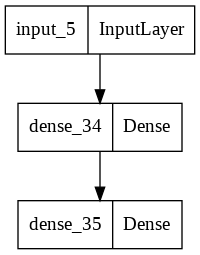

In [79]:
plot_model(model)

In [80]:
model_2.predict(X_test).shape

(38, 5)

In [76]:
# Accedo a las capas

model.layers[1]

In [ ]:
model_2.predict(X_test).shape

(38, 5)

# Ejercicio

Generad nuevos modelos que tengan como salida las capas intermedias de vuestro modelo funcional anterior. Realizad análisis dimensional sobre las salidas de las capas anteriores y comprobad si son las dimensiones correctas de esa capa.